In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Ruta original del archivo Excel
path_xlsx_est = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\PROPS_ESTIMATIVA.xlsx'

In [3]:
# Cargar DataFrame
df_est = pd.read_excel(path_xlsx_est)

In [4]:
# Carpeta donde quieres guardar las imágenes de los grupos
output_folder = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est'
os.makedirs(output_folder, exist_ok=True)  # crea la carpeta si no existe

In [5]:
df_est

,cod_cos,cod_prop,nom_prop,area,tch,produccion,link
0,1,17,LA ESTACADA--OLGUITA,577.839554,56.943315,32904.099663,https://drive.google.com/file/d/1Bsc1iYRtEkc3P...
1,1,1696,LOUISIANA--GARCIA FERNANDO,16.166114,52.179761,843.543961,https://drive.google.com/file/d/1x4OlhIsGu4_Uw...
2,1,1748,ETORE--AGUILERA OLGA,15.517668,54.705443,848.900879,https://drive.google.com/file/d/1o4IH-UbmWD9Pl...
3,2,211,LOS MAGUESES--VACA CUELLAR,45.510089,51.250692,2332.423535,NaN
4,2,265,LOS MAGUESES--BALCAZAR RAQUEL,60.713895,55.331670,3359.401205,NaN
...,...,...,...,...,...,...,...
1695,619,2264,VICTORIA--JUSTINIANO ALFREDO,6.595352,51.458939,339.389808,NaN
1696,620,731,PROPIEDAD DURAN I,2.748365,42.170000,115.898560,NaN
1697,621,1085,LUIS RIOS II--RIOS,10.132482,51.245540,519.244532,NaN
1698,621,2169,PROPIEDAD SAVINA--DIAZ SAVINA,2.350543,45.065668,105.928807,NaN


Grupo 1 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\1.png
Grupo 2 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\2.png
Grupo 3 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\3.png
Grupo 4 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\4.png
Grupo 5 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\5.png
Grupo 6 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\6.png
Grupo 7 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\U

KeyboardInterrupt: 

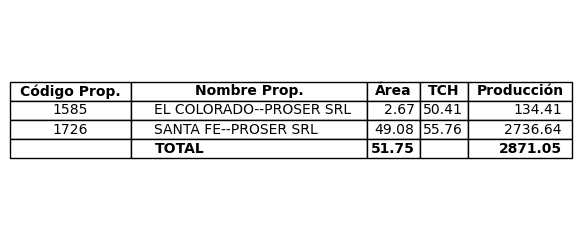

In [11]:
# Guarda tablas por grupo como imágenes usando matplotlib
for grupo, df_grupo in df_est.groupby('cod_cos'):
    # Selecciona y renombra columnas
    df_export = df_grupo[['cod_prop', 'nom_prop', 'area', 'tch', 'produccion']].copy()
    df_export.columns = ['Código Prop.', 'Nombre Prop.', 'Área', 'TCH', 'Producción']

    # Redondear columnas numéricas a dos decimales
    df_export['Área'] = df_export['Área'].round(2)
    df_export['TCH'] = df_export['TCH'].round(2)
    df_export['Producción'] = df_export['Producción'].round(2)

    # Calcular totales de Área y Producción
    total_area = df_export['Área'].sum().round(2)
    total_produccion = df_export['Producción'].sum().round(2)

    # Añadir fila de totales al DataFrame
    total_row = pd.DataFrame({
        'Código Prop.': [''],
        'Nombre Prop.': ['TOTAL'],
        'Área': [total_area],
        'TCH': [''],
        'Producción': [total_produccion]
    })

    df_export = pd.concat([df_export, total_row], ignore_index=True)

    fig, ax = plt.subplots(figsize=(5, len(df_export)*0.5 + 1))
    ax.axis('off')

    tabla = ax.table(cellText=df_export.values,
                     colLabels=df_export.columns,
                     cellLoc='center',
                     loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.auto_set_column_width(col=list(range(len(df_export.columns))))

    # Cabeceras en negrita
    for col in range(len(df_export.columns)):
        tabla[(0, col)].set_text_props(weight='bold')

    # Alinear "Nombre Prop." a la izquierda (incluyendo TOTAL)
    col_nom_prop = df_export.columns.get_loc('Nombre Prop.')
    for i in range(len(df_export)):
        tabla[(i+1, col_nom_prop)].set_text_props(ha='left')

    # Alinear columnas numéricas a la derecha
    for col_name in ['Área', 'TCH', 'Producción']:
        col_idx = df_export.columns.get_loc(col_name)
        for i in range(len(df_export)):
            tabla[(i+1, col_idx)].set_text_props(ha='right')

    # Establecer negrita para la fila de totales
    for col in range(len(df_export.columns)):
        tabla[(len(df_export), col)].set_text_props(weight='bold')

    plt.tight_layout()

    archivo_salida = os.path.join(output_folder, f'{grupo}.png')
    plt.savefig(archivo_salida, dpi=300, bbox_inches='tight')
    plt.close()

    print(f'Grupo {grupo} guardado como imagen en {archivo_salida}')

print('¡Proceso completado correctamente!')


In [12]:
# Guarda tablas por grupo como imágenes usando matplotlib
for grupo, df_grupo in df_est.groupby('cod_cos'):
    # Selecciona y renombra columnas
    df_export = df_grupo[['cod_prop', 'nom_prop', 'area', 'tch', 'produccion']].copy()
    df_export.columns = ['Código Prop.', 'Nombre Prop.', 'Área', 'TCH', 'Producción']

    # Redondear columnas numéricas a dos decimales
    df_export['Área'] = df_export['Área'].round(2)
    df_export['TCH'] = df_export['TCH'].round(2)
    df_export['Producción'] = df_export['Producción'].round(2)

    # Calcular totales de Área y Producción
    total_area = df_export['Área'].sum().round(2)
    total_produccion = df_export['Producción'].sum().round(2)

    # Añadir fila de totales
    total_row = pd.DataFrame({
        'Código Prop.': [''],
        'Nombre Prop.': ['TOTAL'],
        'Área': [total_area],
        'TCH': [''],
        'Producción': [total_produccion]
    })

    df_export = pd.concat([df_export, total_row], ignore_index=True)

    fig, ax = plt.subplots(figsize=(10, len(df_export)*0.5 + 0.5))
    ax.axis('off')

    tabla = ax.table(cellText=df_export.values,
                     colLabels=df_export.columns,
                     cellLoc='center',
                     loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.auto_set_column_width(col=list(range(len(df_export.columns))))

    # Cabeceras en negrita
    for col in range(len(df_export.columns)):
        tabla[(0, col)].set_text_props(weight='bold')

    # Alinear "Nombre Prop." a la izquierda
    col_nom_prop = df_export.columns.get_loc('Nombre Prop.')
    for i in range(len(df_export)):
        tabla[(i+1, col_nom_prop)].set_text_props(ha='left')

    # Alinear columnas numéricas a la derecha
    for col_name in ['Área', 'TCH', 'Producción']:
        col_idx = df_export.columns.get_loc(col_name)
        for i in range(len(df_export)):
            tabla[(i+1, col_idx)].set_text_props(ha='right')

    # Establecer negrita para la fila de totales
    for col in range(len(df_export.columns)):
        tabla[(len(df_export), col)].set_text_props(weight='bold')

    plt.tight_layout(pad=0.5)  # ajustar padding interno
    archivo_salida = os.path.join(output_folder, f'{grupo}.png')
    plt.savefig(archivo_salida, dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.close()

    print(f'Grupo {grupo} guardado como imagen en {archivo_salida}')

print('¡Proceso completado correctamente!')


Grupo 1 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\1.png
Grupo 2 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\2.png
Grupo 3 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\3.png
Grupo 4 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\4.png
Grupo 5 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\5.png
Grupo 6 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\6.png
Grupo 7 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\U

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B27D38BE20> (for post_execute):



KeyboardInterrupt



In [6]:
# Guarda tablas por grupo como imágenes usando matplotlib
for grupo, df_grupo in df_est.groupby('cod_cos'):
    # Selecciona y renombra columnas
    df_export = df_grupo[['cod_prop', 'nom_prop', 'area', 'tch', 'produccion']].copy()
    df_export.columns = ['Código Prop.', 'Nombre Prop.', 'Área', 'TCH', 'Producción']

    # Redondear columnas numéricas a dos decimales
    df_export['Área'] = df_export['Área'].round(2)
    df_export['TCH'] = df_export['TCH'].round(2)
    df_export['Producción'] = df_export['Producción'].round(2)

    # Calcular totales de Área y Producción
    total_area = df_export['Área'].sum().round(2)
    total_produccion = df_export['Producción'].sum().round(2)

    # Añadir fila de totales
    total_row = pd.DataFrame({
        'Código Prop.': [''],
        'Nombre Prop.': ['TOTAL'],
        'Área': [total_area],
        'TCH': [''],
        'Producción': [total_produccion]
    })

    df_export = pd.concat([df_export, total_row], ignore_index=True)

    # Crear figura con dimensiones ajustadas exactamente al tamaño de la tabla
    fig, ax = plt.subplots(figsize=(5, len(df_export) * 0.1))
    ax.axis('off')

    tabla = ax.table(cellText=df_export.values,
                     colLabels=df_export.columns,
                     cellLoc='center',
                     loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.auto_set_column_width(col=list(range(len(df_export.columns))))

    # Cabeceras en negrita
    for col in range(len(df_export.columns)):
        tabla[(0, col)].set_text_props(weight='bold')

    # Alinear "Nombre Prop." a la izquierda
    col_nom_prop = df_export.columns.get_loc('Nombre Prop.')
    for i in range(len(df_export)):
        tabla[(i+1, col_nom_prop)].set_text_props(ha='left')

    # Alinear columnas numéricas a la derecha
    for col_name in ['Área', 'TCH', 'Producción']:
        col_idx = df_export.columns.get_loc(col_name)
        for i in range(len(df_export)):
            tabla[(i+1, col_idx)].set_text_props(ha='right')

    # Establecer negrita para la fila de totales
    for col in range(len(df_export.columns)):
        tabla[(len(df_export), col)].set_text_props(weight='bold')

    # Eliminar completamente los márgenes (sin espacios adicionales)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    archivo_salida = os.path.join(output_folder, f'{grupo}.png')
    plt.savefig(archivo_salida, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

    print(f'Grupo {grupo} guardado como imagen en {archivo_salida}')

print('¡Proceso completado correctamente!')


Grupo 1 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\1.png
Grupo 2 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\2.png
Grupo 3 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\3.png
Grupo 4 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\4.png
Grupo 5 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\5.png
Grupo 6 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2025\ESTIMATIVAS\_DATA_ENVIAR\tablas_est\6.png
Grupo 7 guardado como imagen en C:\Documents\Ingenio Azucarero Guabira S.A\U